In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [15]:
df = pd.read_csv('HY_Universe_corporate bond.csv')

In [16]:
df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,Issued Amount,Maturity Type,Coupon Type,Maturity At Issue months,Industry,LiquidityScore,Months in JNK,Months in HYG,Months in Both,IN_ETF,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,days_diff_max,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,405000000.0,CALLABLE,PAY-IN-KIND,60.87,Real Estate,10.891365,Nan,Nan,Nan,No,0.108914,301,2.640038e+08,1000000.0,877088.9535,128,1132,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,499285000.0,AT MATURITY,FIXED,173.13,Banks,24.625486,0,33,0,Yes,0.246255,2854,2.668630e+08,24000.0,93504.9054,614,1041,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,460000000.0,CALLABLE,FIXED,58.87,Household Products/Wares,12.841557,Nan,Nan,Nan,No,0.128416,434,2.814210e+08,875000.0,648435.4839,183,439,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,500000000.0,CALLABLE,FIXED,83.63,Household Products/Wares,26.226355,43,0,0,Yes,0.262264,4975,1.163167e+09,26000.0,233802.4121,773,1227,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,400000000.0,CALLABLE,FIXED,97.17,Household Products/Wares,14.138395,Nan,Nan,Nan,No,0.141384,388,2.493420e+08,750000.0,642634.0206,126,246,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2721 entries, 0 to 2720
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CUSIP                       2721 non-null   object 
 1   Ticker                      2721 non-null   object 
 2   Issue Date                  2721 non-null   object 
 3   Maturity                    2721 non-null   object 
 4   1st Call Date               2721 non-null   object 
 5   Moodys                      2721 non-null   object 
 6   S_and_P                     2721 non-null   object 
 7   Fitch                       2721 non-null   object 
 8   Bloomberg Composite Rating  2721 non-null   object 
 9   Coupon                      2721 non-null   float64
 10  Issued Amount               2721 non-null   float64
 11  Maturity Type               2721 non-null   object 
 12  Coupon Type                 2721 non-null   object 
 13  Maturity At Issue months    2721 

#### Initial observations
- Certain columns are not in the correct format.
- Convert few categorical columns to numerical if we're going to run any model
- Liquidity score could be a target variable

In [18]:
# Dropping extra columns
# df = df.drop(['rowindex', 'contract'], axis=1)

In [19]:
# Number of rows and columns
df.shape

(2721, 37)

The corporate bond dataset has 2721 rows and 37 columns.

Let's check for null values

In [20]:
df.isnull().sum()

CUSIP                         0
Ticker                        0
Issue Date                    0
Maturity                      0
1st Call Date                 0
Moodys                        0
S_and_P                       0
Fitch                         0
Bloomberg Composite Rating    0
Coupon                        0
Issued Amount                 0
Maturity Type                 0
Coupon Type                   0
Maturity At Issue months      0
Industry                      0
LiquidityScore                0
Months in JNK                 0
Months in HYG                 0
Months in Both                0
IN_ETF                        0
LIQ SCORE                     0
n_trades                      0
volume_trades                 0
total_median_size             0
total_mean_size               0
n_days_trade                  0
days_diff_max                 0
percent_intra_dealer          0
percent_uncapped              0
bond_type                     0
Client_Trade_Percentage       0
weekly_m

This is wierd.

We saw Nan's in the dataframe but it is not reflecting by isnull. 

Let's check out why

In [21]:
# Although this cell was an error, I wanted to find the datatype and i got the answer.

df['Moodys'][0].type

AttributeError: 'str' object has no attribute 'type'

In [22]:
# Since its stored as string, we now replace all the Nan in the dataframe with real nans
df.replace('Nan', np.nan, inplace=True)

In [23]:
df.isnull().sum()

CUSIP                            0
Ticker                           0
Issue Date                       0
Maturity                         0
1st Call Date                 1757
Moodys                         161
S_and_P                        186
Fitch                         1170
Bloomberg Composite Rating      41
Coupon                           0
Issued Amount                    0
Maturity Type                    0
Coupon Type                      0
Maturity At Issue months         0
Industry                         0
LiquidityScore                   0
Months in JNK                 1408
Months in HYG                 1408
Months in Both                1408
IN_ETF                           0
LIQ SCORE                        0
n_trades                         0
volume_trades                    0
total_median_size                0
total_mean_size                  0
n_days_trade                     0
days_diff_max                    0
percent_intra_dealer             0
percent_uncapped    

Now we know the real amount of Nans in the dataframe. Now are these significant Nans?

- 1st Call Date: This can contain null values but we need to make sure the total count of 1st call dates present is equal to the total callable bonds in Maturity type. 
- Moodys: Moodys does not have ratings for 6% of the dataset. That's not a big deal.
- S_and_P: S_and_P does not have ratings for 7% of the dataset. That's not a big deal.
- Fitch: Fitch does not have ratings for 43% of the dataset. This is significant. This might mean that Fitch might not be a good predcitor variable since it has plenty of missing data. We will drop the column.
- Bloomberg Composite Rating: Bloomberg has the most ratings for the whole dataset adn have a super low 1.5% null rate. In terms of avaliability of data, this might be the best predictor variable among other ratings.
- Months in JNK & HYG and Months in Both have 51% Nan values. We will drop those columns too.

In [24]:
df = df.drop(['Fitch', 'Months in Both', 'Months in JNK', 'Months in HYG'], axis=1) # Drop these columns as they contained a lot of null values
df = df[df['S_and_P'].notna()] # Remove rows containing null values in S_and_P column
df = df[df['Moodys'].notna()] # Remove rows containing null values in Moodys column

In [25]:
# We can check the null count below
df.isnull().sum()

CUSIP                            0
Ticker                           0
Issue Date                       0
Maturity                         0
1st Call Date                 1562
Moodys                           0
S_and_P                          0
Bloomberg Composite Rating       0
Coupon                           0
Issued Amount                    0
Maturity Type                    0
Coupon Type                      0
Maturity At Issue months         0
Industry                         0
LiquidityScore                   0
IN_ETF                           0
LIQ SCORE                        0
n_trades                         0
volume_trades                    0
total_median_size                0
total_mean_size                  0
n_days_trade                     0
days_diff_max                    0
percent_intra_dealer             0
percent_uncapped                 0
bond_type                        0
Client_Trade_Percentage          0
weekly_mean_volume               0
weekly_median_volume

### Univariate Analysis

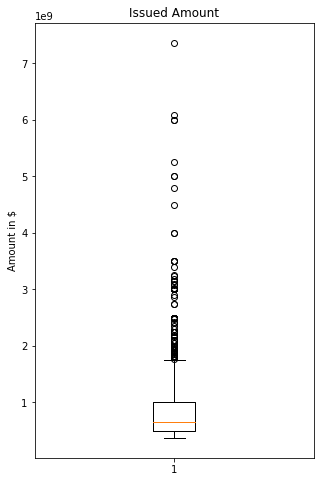

In [32]:
# Plot for Issued Amount
plt.boxplot(df['Issued Amount'])
plt.rcParams["figure.figsize"] = (5, 8)
plt.title("Issued Amount")
plt.ylabel("Amount in $")
plt.margins(x = 0)
plt.show()

Text(0.5, 1.0, 'Distribution of Issued Amount')

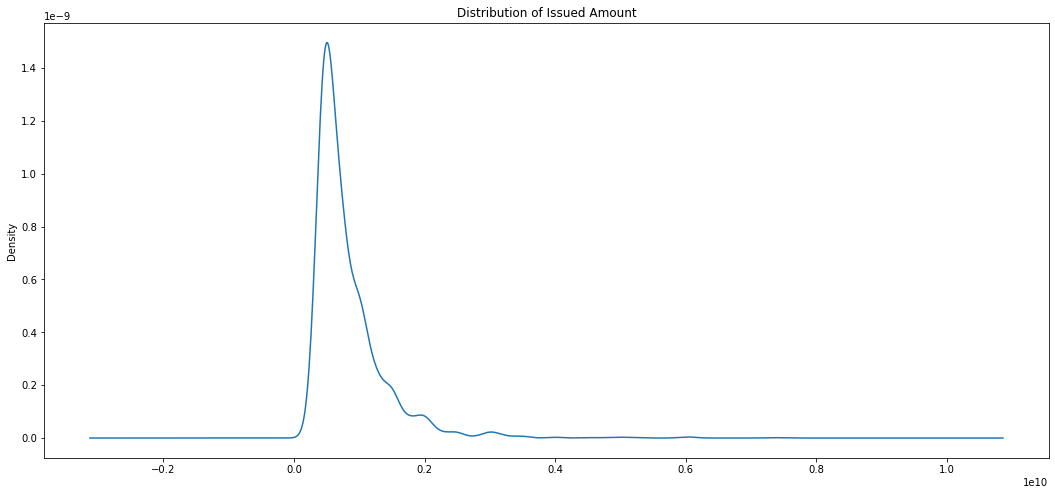

In [35]:
df['Issued Amount'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("KDE of Issued Amount")

Amount has a lot of outliers. Since this might be one of the features which could potentially have a large impact on our model, let's perform outlier treatment.

In [37]:
# Outlier treatment

Q1=df['Issued Amount'].quantile(0.25)
Q3=df['Issued Amount'].quantile(0.75)
IQR=Q3-Q1

# print(Q1)
# print(Q3)
# print(IQR)

Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)

# print(Lower_Whisker, Upper_Whisker)

df = df[df['Issued Amount']< Upper_Whisker]
df = df[df['Issued Amount']> Lower_Whisker]

df.shape

(2269, 33)

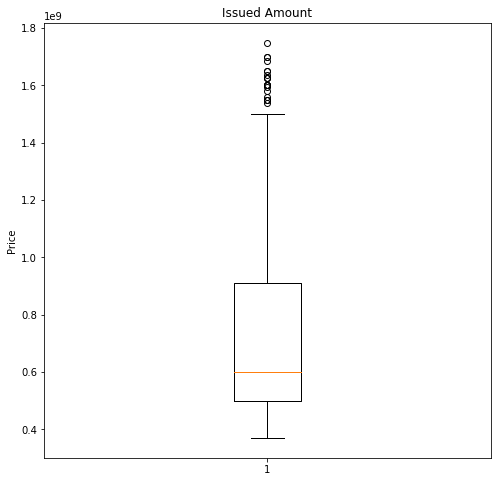

In [44]:
# Plot for Issued Amount
plt.boxplot(df['Issued Amount'])
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Issued Amount")
plt.ylabel("Price")
plt.show()

Text(0.5, 1.0, 'Distribution of Issued Amount')

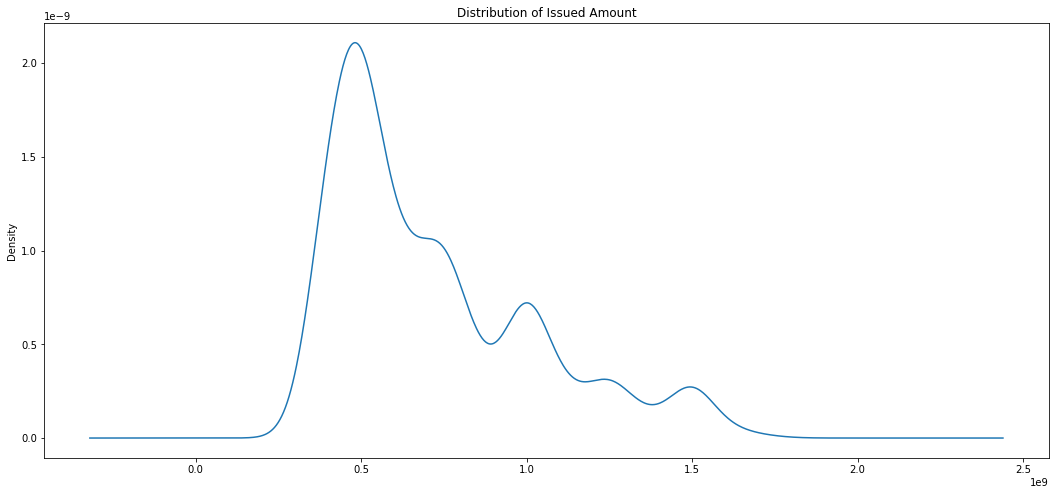

In [46]:
df['Issued Amount'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("KDE of Issued Amount")

We can observe above how the box plot and the kde changed for Issued Amount pre and post outlier treatment.

Let's see how liquidity score is distributed

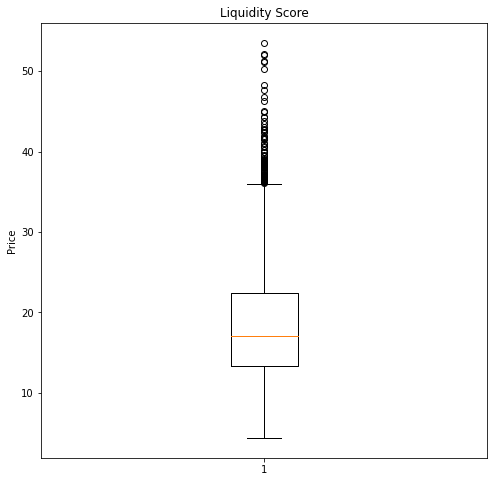

In [48]:
# Plot for Liquidity Score
plt.boxplot(df['LiquidityScore'])
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Liquidity Score")
plt.ylabel("Price")
plt.margins(x = 0)
plt.show()

Text(0.5, 1.0, 'KDE of Liquidity Score')

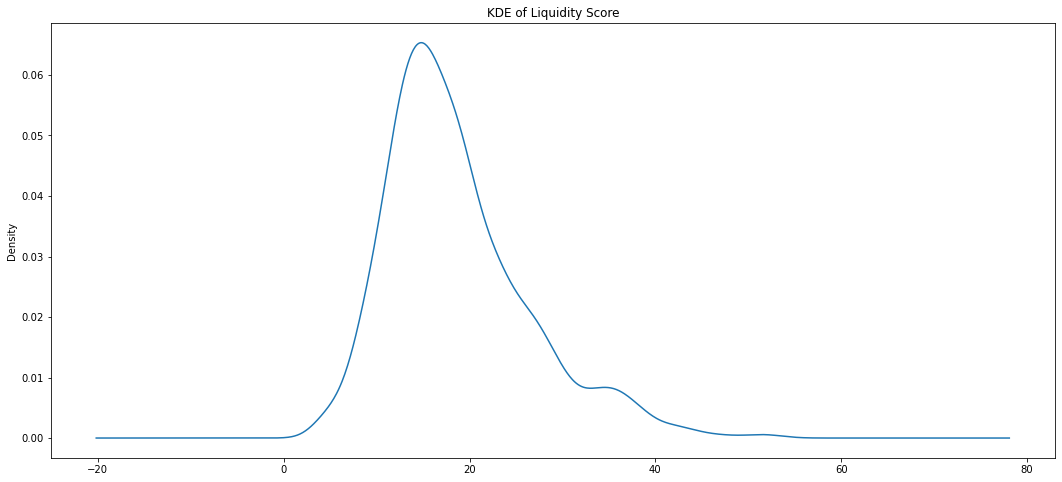

In [50]:
df['LiquidityScore'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("KDE of Liquidity Score")

Liquidity Score also has a lot of outliers. Since we are considering this to be our target variable, let's perform outlier treatment for this variable too

In [51]:
# Outlier treatment

Q1=df['LiquidityScore'].quantile(0.25)
Q3=df['LiquidityScore'].quantile(0.75)
IQR=Q3-Q1

# print(Q1)
# print(Q3)
# print(IQR)

Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)

# print(Lower_Whisker, Upper_Whisker)

df = df[df['LiquidityScore']< Upper_Whisker]
df = df[df['LiquidityScore']> Lower_Whisker]

df.shape

(2185, 33)

We can observe that the shape did not change, meaning there are no outliers were removed by the 1.5IQR method in Liquidity Score column.

Let's plot a few more distributions

Text(0.5, 1.0, 'KDE of LIQ SCORE')

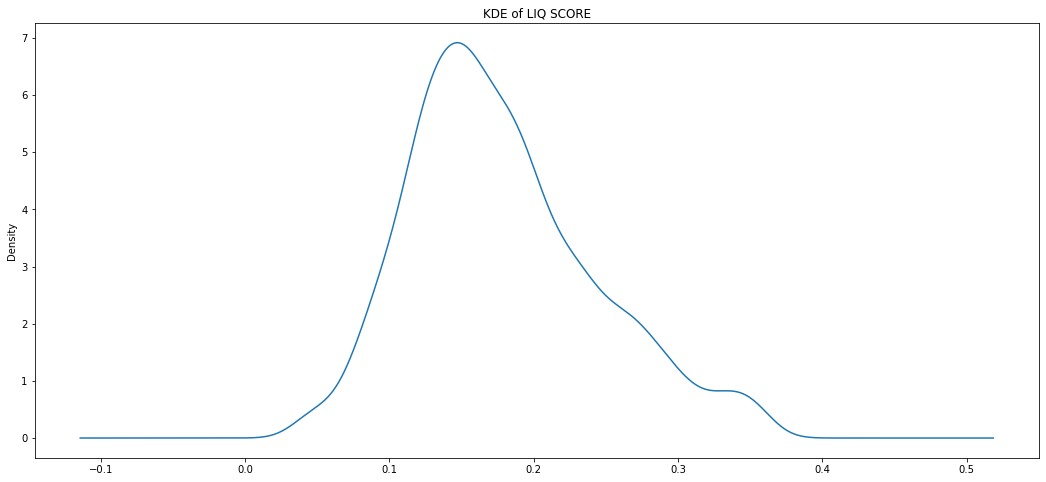

In [58]:
df['LIQ SCORE'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("KDE of LIQ SCORE")

LIQ SCORE seems like the scaled value of Liquidity Score

Text(0.5, 1.0, 'Distribution of Coupon')

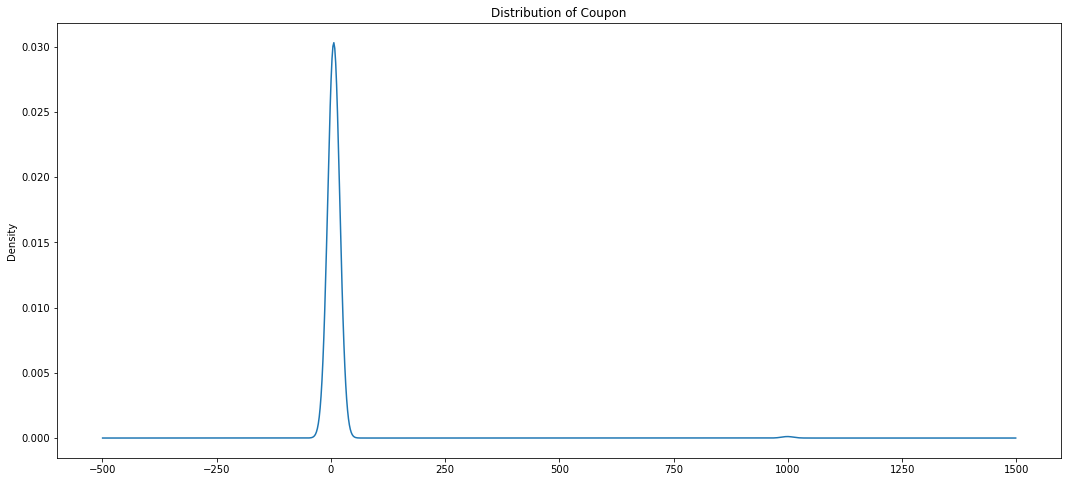

In [60]:
df['Coupon'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Distribution of Coupon")

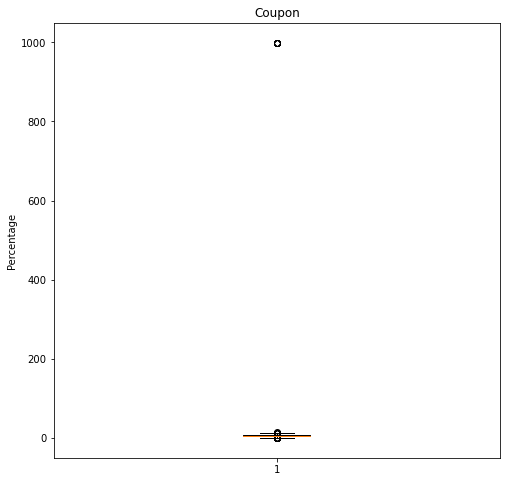

In [62]:
# Plot for Liquidity Score
plt.boxplot(df['Coupon'])
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Coupon")
plt.ylabel("Percentage")
plt.margins(x = 0)
plt.show()

In [63]:
# Outlier treatment

Q1=df['Coupon'].quantile(0.25)
Q3=df['Coupon'].quantile(0.75)
IQR=Q3-Q1
# print(Q1)
# print(Q3)
# print(IQR)
Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)
# print(Lower_Whisker, Upper_Whisker)
df = df[df['Coupon']< Upper_Whisker]
df = df[df['Coupon']> Lower_Whisker]
df.shape

(2091, 33)

Let's see how the plots change after outlier treatment

Text(0.5, 1.0, 'Distribution of Coupon')

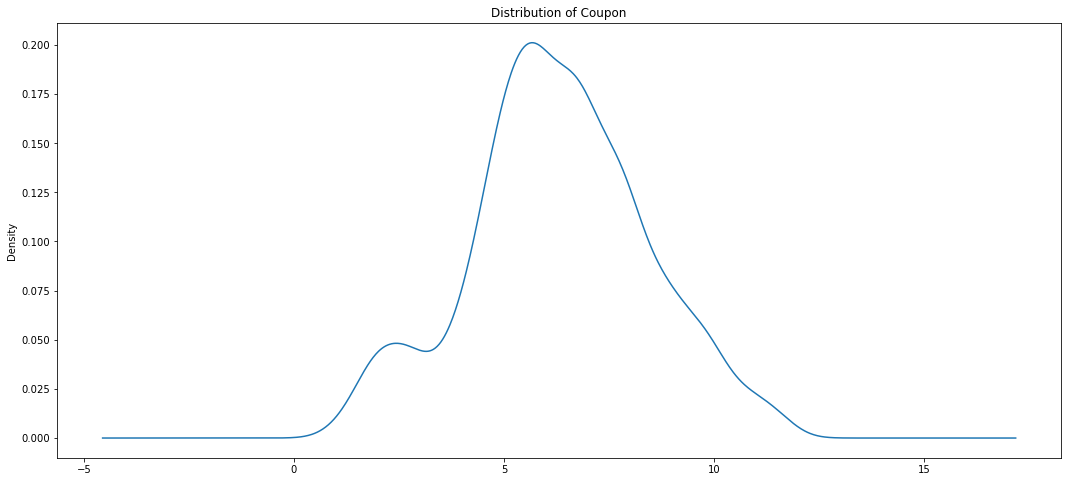

In [65]:
df['Coupon'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Distribution of Coupon")

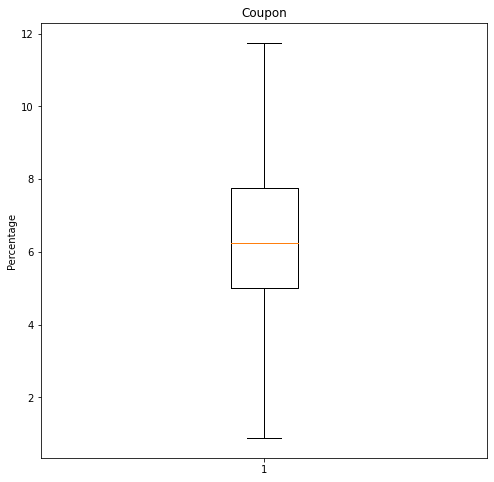

In [67]:
# Plot for Liquidity Score
plt.boxplot(df['Coupon'])
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Coupon")
plt.ylabel("Percentage")
plt.margins(x = 0)
plt.show()

Text(0.5, 1.0, 'Distribution of Maturity At Issue months')

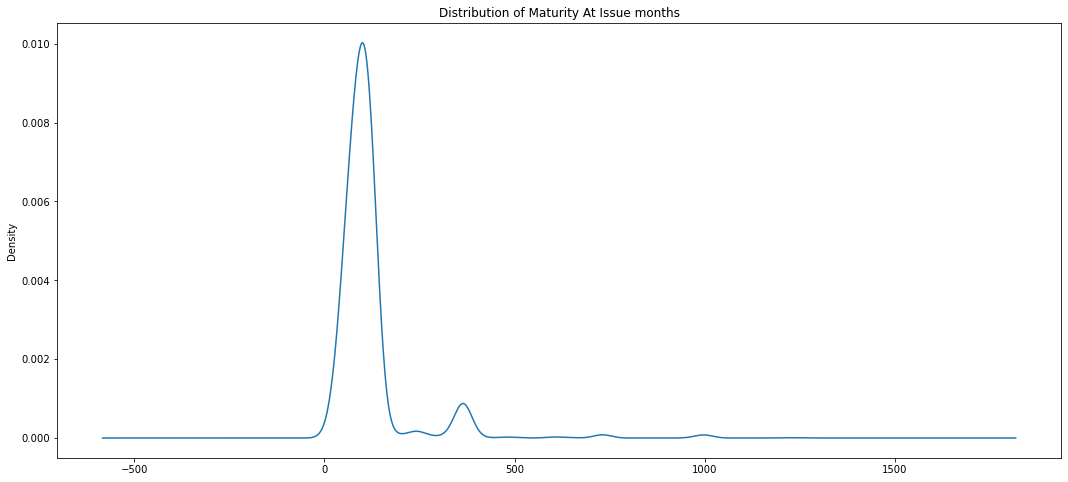

In [70]:
df['Maturity At Issue months'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Distribution of Maturity At Issue months")

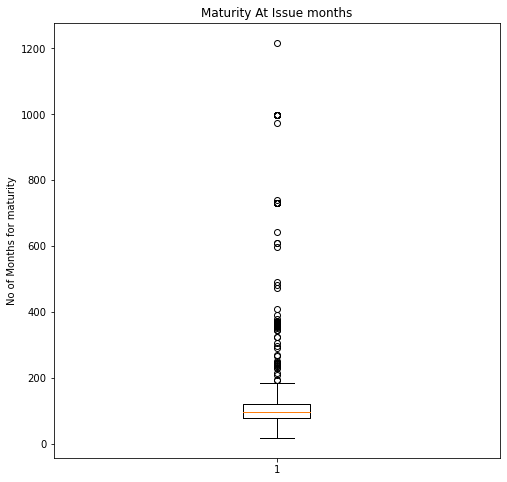

In [72]:
# Plot for Maturity At Issue months
plt.boxplot(df['Maturity At Issue months'])
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Maturity At Issue months")
plt.ylabel("No of Months for maturity")
plt.margins(x = 0)
plt.show()

In [73]:
# Outlier treatment

Q1=df['Maturity At Issue months'].quantile(0.25)
Q3=df['Maturity At Issue months'].quantile(0.75)
IQR=Q3-Q1

# print(Q1)
# print(Q3)
# print(IQR)

Lower_Whisker = Q1-(1.5*IQR)
Upper_Whisker = Q3+(1.5*IQR)

# print(Lower_Whisker, Upper_Whisker)

df = df[df['Maturity At Issue months']< Upper_Whisker]
df = df[df['Maturity At Issue months']> Lower_Whisker]

df.shape

(1924, 33)

In [84]:
1924/2721

0.707092980521867

We still have 70% of the data left after our outlier treatments for the columns we feel will be significant for our model.

Let's see how the plots change after outlier treatment.

Text(0.5, 1.0, 'Distribution of Maturity At Issue months')

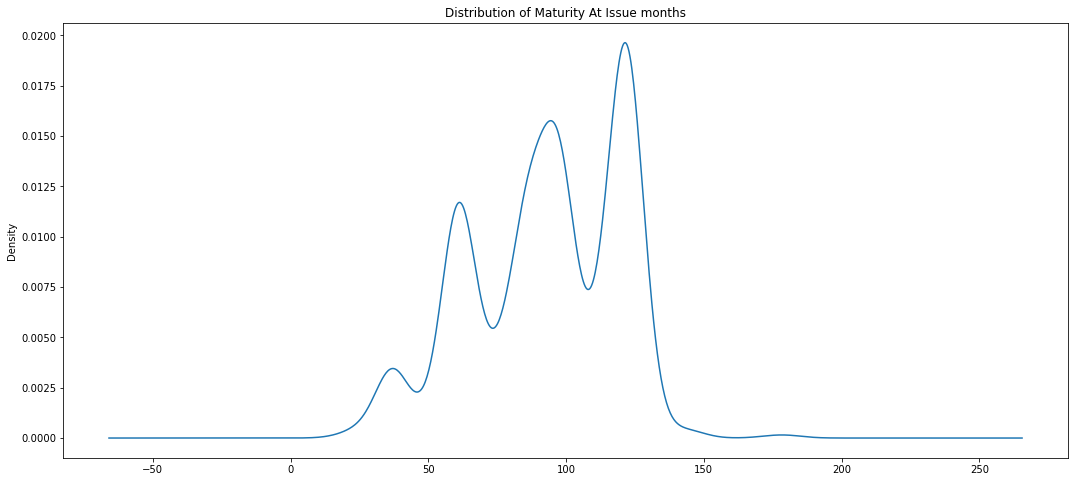

In [81]:
df['Maturity At Issue months'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Distribution of Maturity At Issue months")

There seems to be some concentration of bonds for specific number of maturity months. This can be visualised better using a histogram

Text(0.5, 1.0, 'Distribution of Maturity At Issue months')

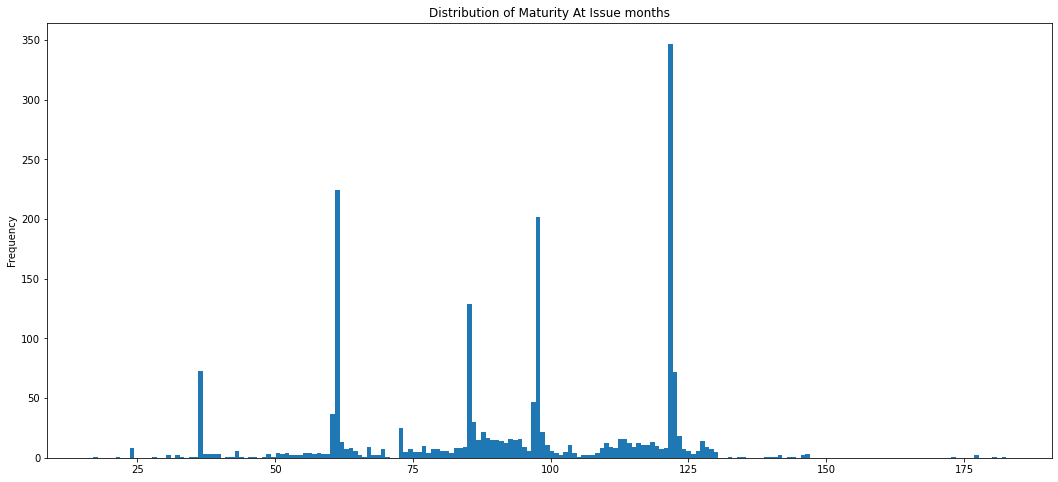

In [83]:
df['Maturity At Issue months'].plot(kind='hist',bins=200)
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Distribution of Maturity At Issue months")

Let's see a few more KDE plots

Text(0.5, 1.0, 'Distribution of n_trades')

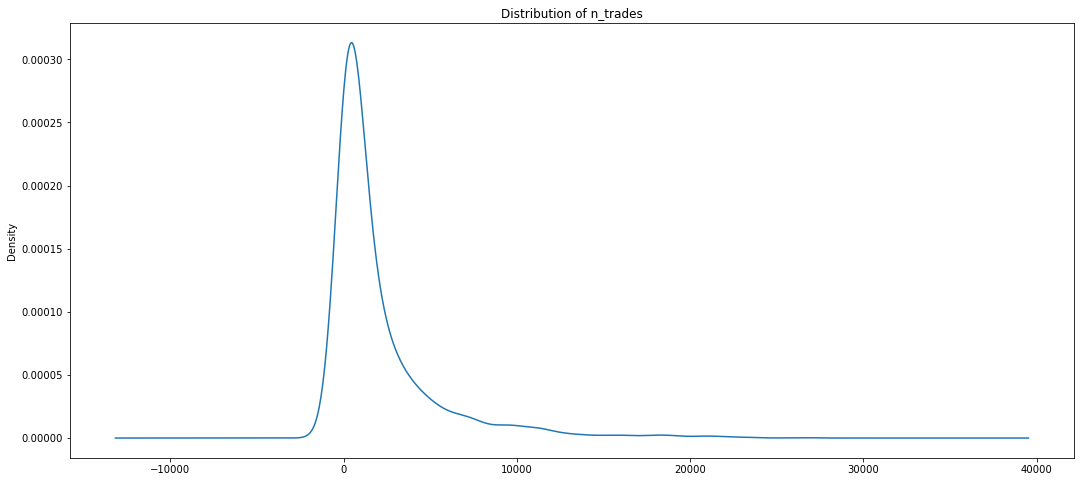

In [85]:
df['n_trades'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Distribution of n_trades")

Text(0.5, 1.0, 'Distribution of n_days_trade')

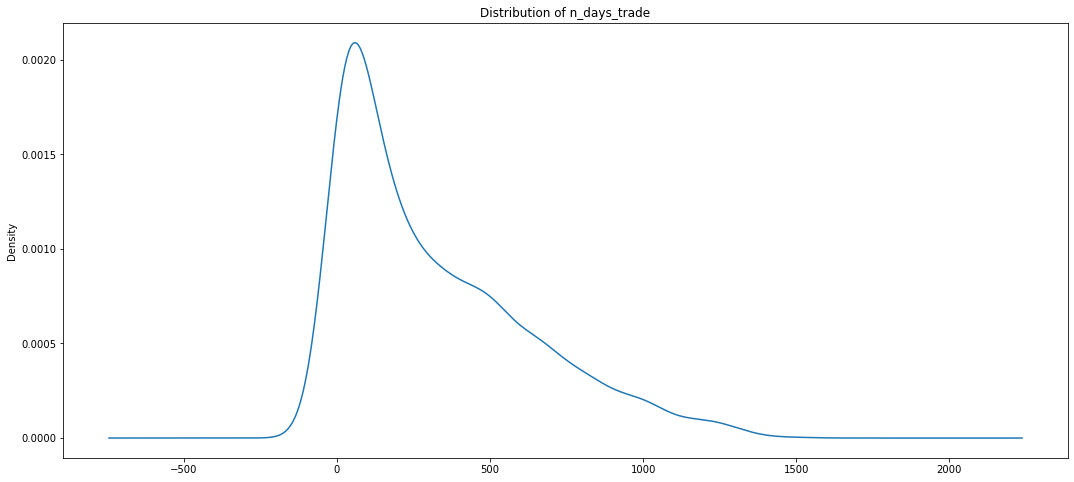

In [86]:
df['n_days_trade'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Distribution of n_days_trade")

Text(0.5, 1.0, 'Distribution of percent_intra_dealer')

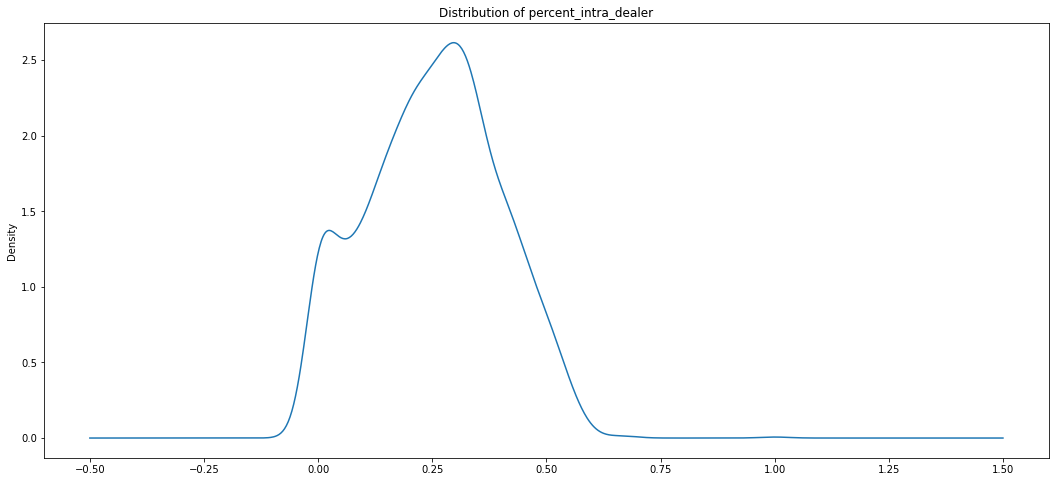

In [87]:
df['percent_intra_dealer'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Distribution of percent_intra_dealer")

Text(0.5, 1.0, 'Distribution of percent_uncapped')

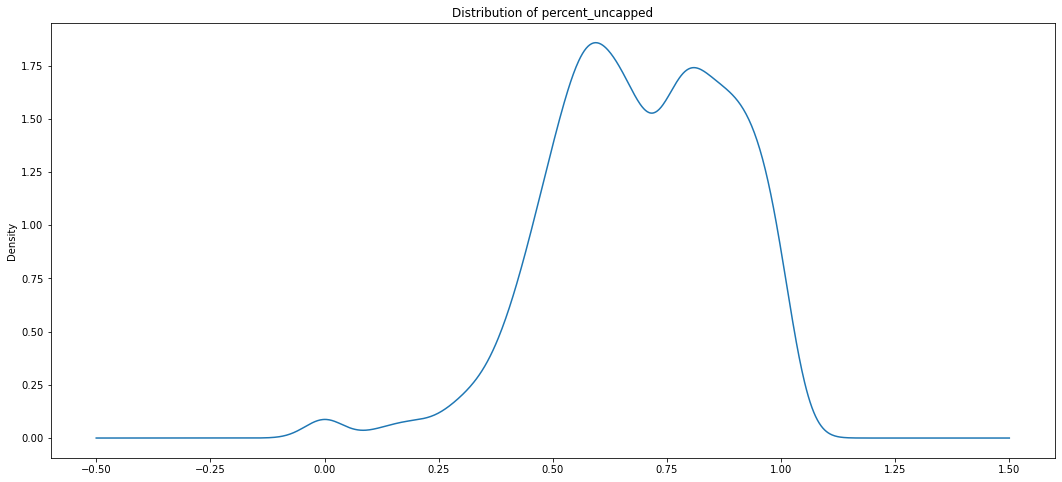

In [88]:
df['percent_uncapped'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Distribution of percent_uncapped")

Text(0.5, 1.0, 'Distribution of weekly_mean_volume')

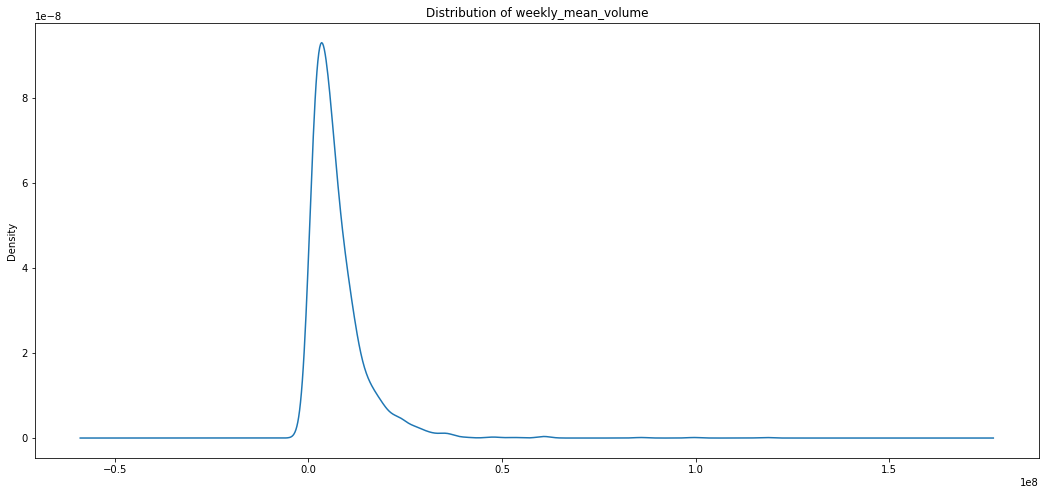

In [89]:
df['weekly_mean_volume'].plot(kind='kde')
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Distribution of weekly_mean_volume")

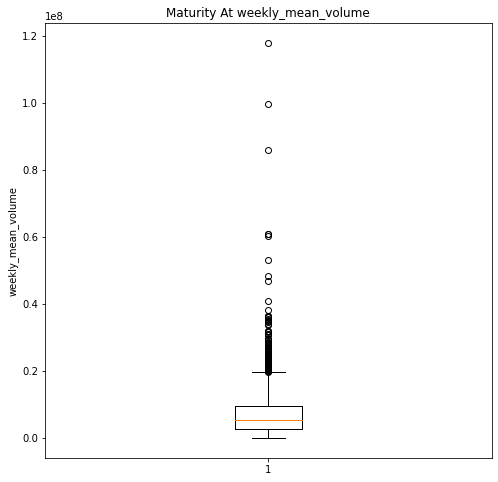

In [95]:
# Plot for Maturity At Issue months
plt.boxplot(df['weekly_mean_volume'])
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Maturity At weekly_mean_volume")
plt.ylabel("weekly_mean_volume")
plt.margins(x = 0)
plt.show()

Few more columns that can be plotted by anyone who is interested to explore are the following:
- volume_trades
- total_median_size
- total_mean_size
- days_diff_max
- bond_type

Let's visualise few categorical variables

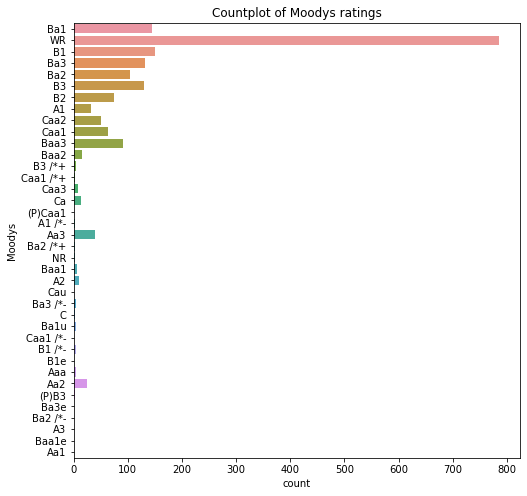

In [106]:
sns.countplot(y ='Moodys', data = df)
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Countplot of Moodys ratings")
plt.show()

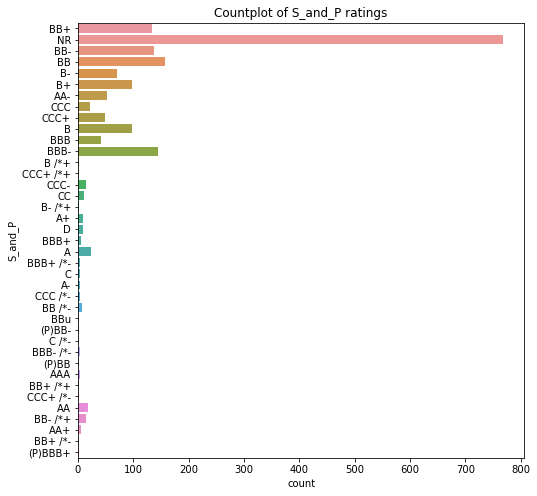

In [108]:
sns.countplot(y ='S_and_P', data = df)
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Countplot of S_and_P ratings")
plt.show()

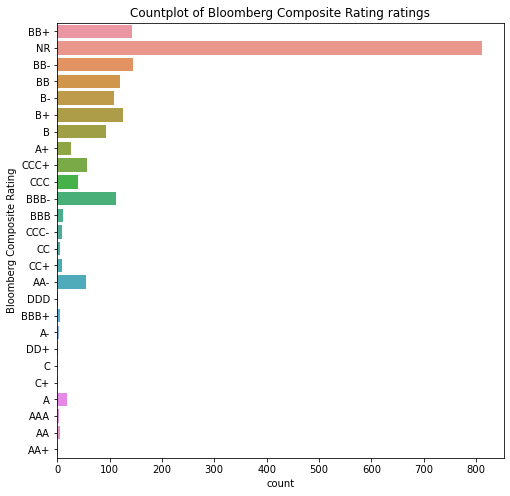

In [107]:
sns.countplot(y ='Bloomberg Composite Rating', data = df)
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Countplot of Bloomberg Composite Rating ratings")
plt.show()

We can obseve that almost 1000 rows bonds are not rated by ratings agencies.

This suggests to us that we need to be careful how much signicance these columns have on our model.

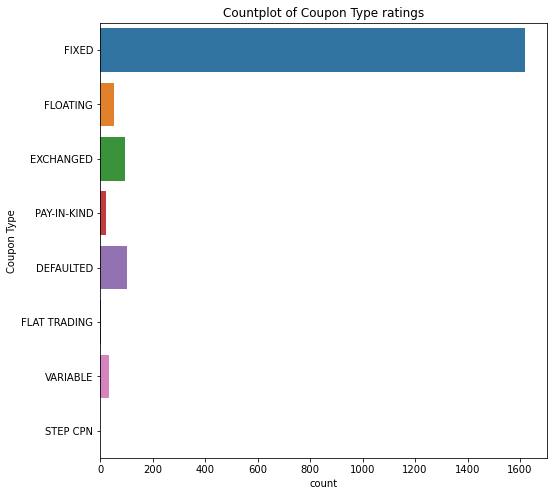

In [109]:
sns.countplot(y ='Coupon Type', data = df)
plt.rcParams["figure.figsize"] = (8, 8)
plt.title("Countplot of Coupon Type ratings")
plt.show()

This suggests to us that our model could be biased towards fixed coupon bonds.

Another way to percieve this is that our model can be optimized to work on Fixed coupon bonds

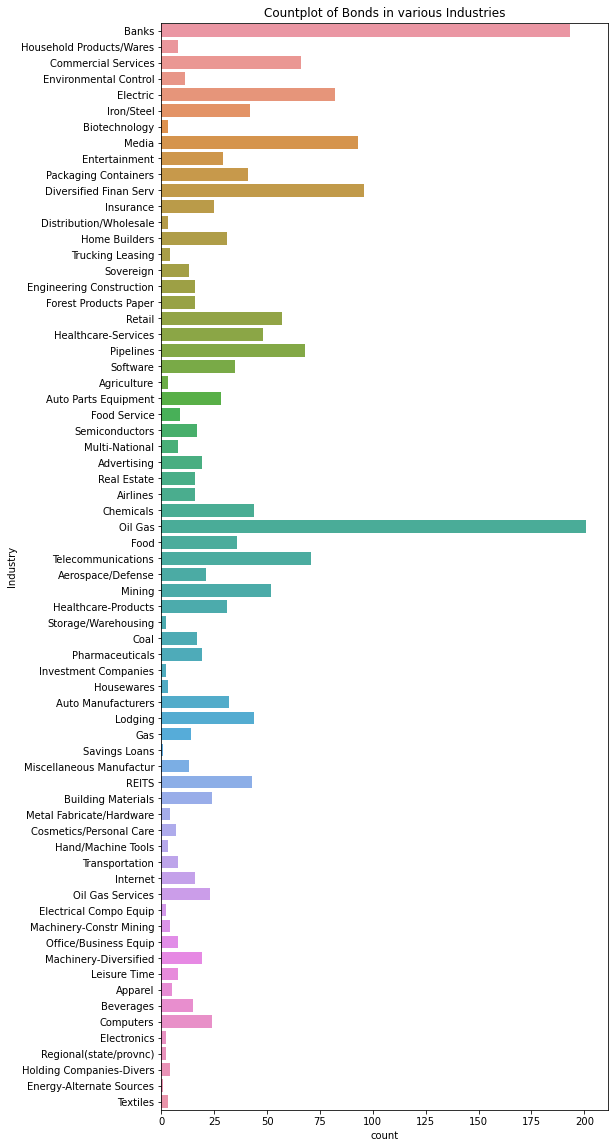

In [111]:
sns.countplot(y ='Industry', data = df)
plt.rcParams["figure.figsize"] = (8, 20)
plt.title("Countplot of Bonds in various Industries")
plt.show()

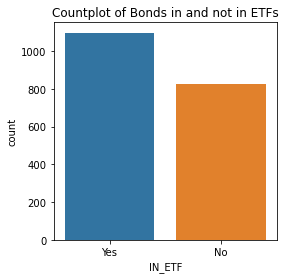

In [113]:
sns.countplot(x ='IN_ETF', data = df)
plt.rcParams["figure.figsize"] = (4, 4)
plt.title("Countplot of Bonds in and not in ETFs")
plt.show()

Now that we have a basic understanding of the different columns and their distributions, let's check correlations for all the variables

In [114]:
# Referred https://stackoverflow.com/questions/39409866/correlation-heatmap
import seaborn as sns

# calculate the correlation matrix
corr = df.corr()

# plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

/var/folders/qd/4kmrcd3d36z3987s403vbj3r0000gn/T/ipykernel_79902/2336383717.py:26: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap, axis=1)\


,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,days_diff_max,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
Coupon,1.00,-0.09,0.20,0.10,0.10,0.06,0.14,-0.01,-0.06,0.15,0.16,0.06,0.03,-0.08,-0.05,-0.00,-0.02,-0.02,-0.11,-0.01,-0.09
Issued Amount,-0.09,1.00,-0.01,0.14,0.14,0.15,0.39,0.10,0.13,0.10,-0.01,0.05,-0.14,-0.19,-0.03,0.42,0.44,0.34,0.14,0.23,0.17
Maturity At Issue months,0.20,-0.01,1.00,0.22,0.22,0.12,0.14,-0.16,-0.18,0.19,0.19,0.15,0.16,-0.14,-0.04,0.08,0.07,0.13,-0.03,0.11,-0.00
LiquidityScore,0.10,0.14,0.22,1.00,1.00,0.80,0.75,-0.62,-0.64,0.86,0.72,0.69,0.67,-0.36,-0.53,0.28,0.29,0.38,-0.01,0.62,0.21
LIQ SCORE,0.10,0.14,0.22,1.00,1.00,0.80,0.75,-0.62,-0.64,0.86,0.72,0.69,0.67,-0.36,-0.53,0.28,0.29,0.38,-0.01,0.62,0.21
n_trades,0.06,0.15,0.12,0.80,0.80,1.00,0.73,-0.47,-0.50,0.73,0.51,0.47,0.43,-0.26,-0.41,0.22,0.23,0.34,-0.07,0.78,0.22
volume_trades,0.14,0.39,0.14,0.75,0.75,0.73,1.00,-0.23,-0.22,0.80,0.56,0.38,0.18,-0.50,-0.33,0.40,0.40,0.54,-0.07,0.49,0.10
total_median_size,-0.01,0.10,-0.16,-0.62,-0.62,-0.47,-0.23,1.00,0.94,-0.47,-0.41,-0.63,-0.83,0.02,0.51,0.16,0.13,0.04,0.17,-0.36,-0.09
total_mean_size,-0.06,0.13,-0.18,-0.64,-0.64,-0.50,-0.22,0.94,1.00,-0.45,-0.40,-0.67,-0.86,0.02,0.53,0.15,0.13,0.02,0.21,-0.41,-0.09
n_days_trade,0.15,0.10,0.19,0.86,0.86,0.73,0.80,-0.47,-0.45,1.00,0.80,0.48,0.40,-0.45,-0.40,0.09,0.11,0.26,-0.15,0.36,-0.02


From the correlation heatmap above, we can observe the following high correlation attributes:
- 0.87: n days trade and liquidity score 0.86
- 0.73: days_diff_max and lquidty score 0.72
- -0.83: percent uncapped and total median size
- -0.86: percent uncapped and total mean size

- Our initial observation that Liquidity Score and LIQ SCORE are the same is confirmed as they have the same correlations with other variables. We can drop one of the columns when we create our feature set.

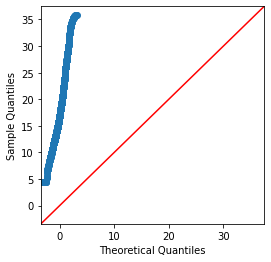

In [121]:
import statsmodels.api as sm

fig = sm.qqplot(df['LiquidityScore'], line='45')
plt.show()

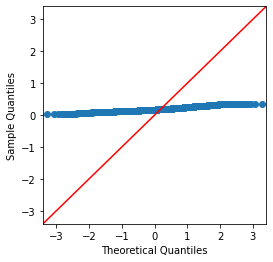

In [122]:
import statsmodels.api as sm

fig = sm.qqplot(df['LIQ SCORE'], line='45')
plt.show()

We can explore why there is such variation in the qq plots if they represent the same data

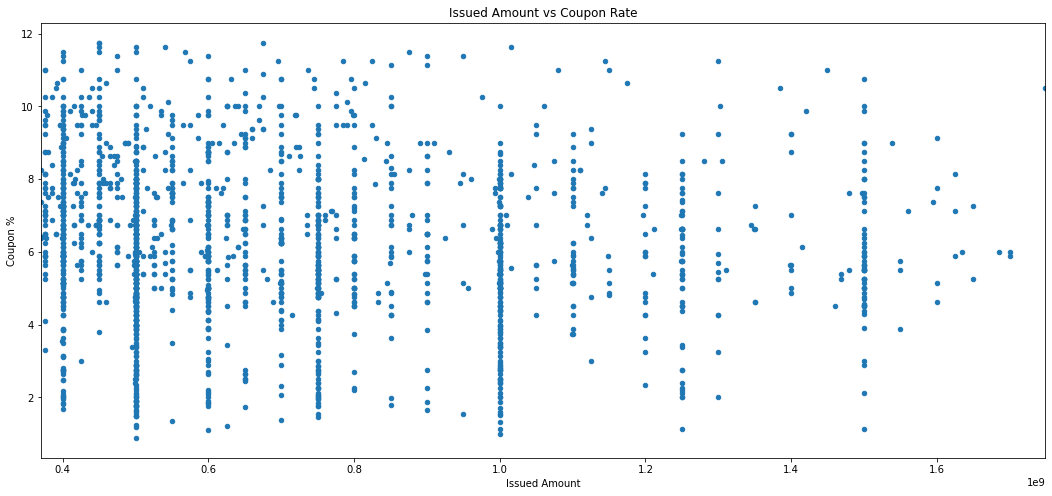

In [129]:

df.plot(kind = "scatter", x = "Issued Amount", y = "Coupon")
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Issued Amount vs Coupon Rate")
# plt.ylim(-3,3) # set y axis range if needed
plt.xlabel("Issued Amount")
plt.ylabel("Coupon %")
plt.margins(x = 0)

Maybe smaler bonds tend to have higher coupon rates?

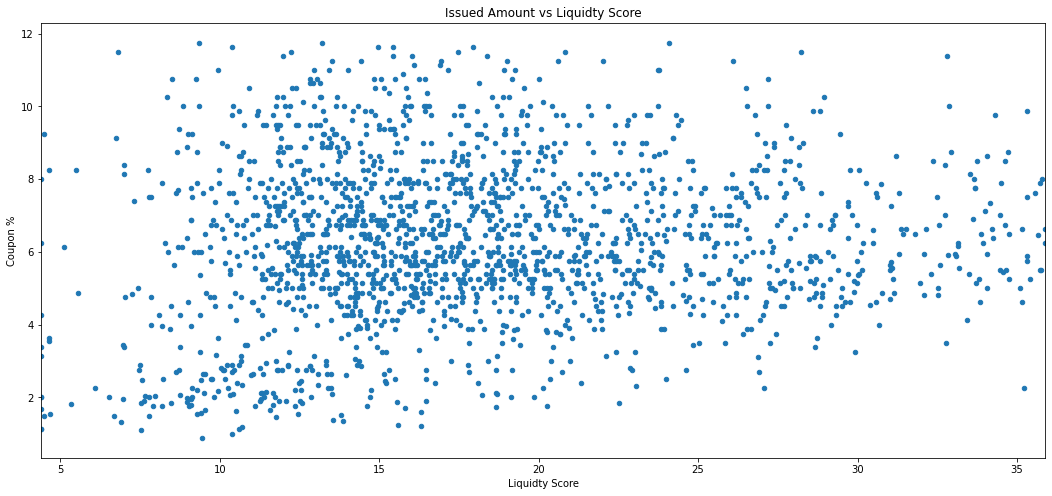

In [133]:

df.plot(kind = "scatter", x = "LiquidityScore", y = "Coupon")
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Liquidty Score vs Coupon %")
# plt.ylim(-3,3) # set y axis range if needed
plt.xlabel("Liquidty Score")
plt.ylabel("Coupon %")
plt.margins(x = 0)

There isnt any visual relationship between Issued Amount & Liquidty Score

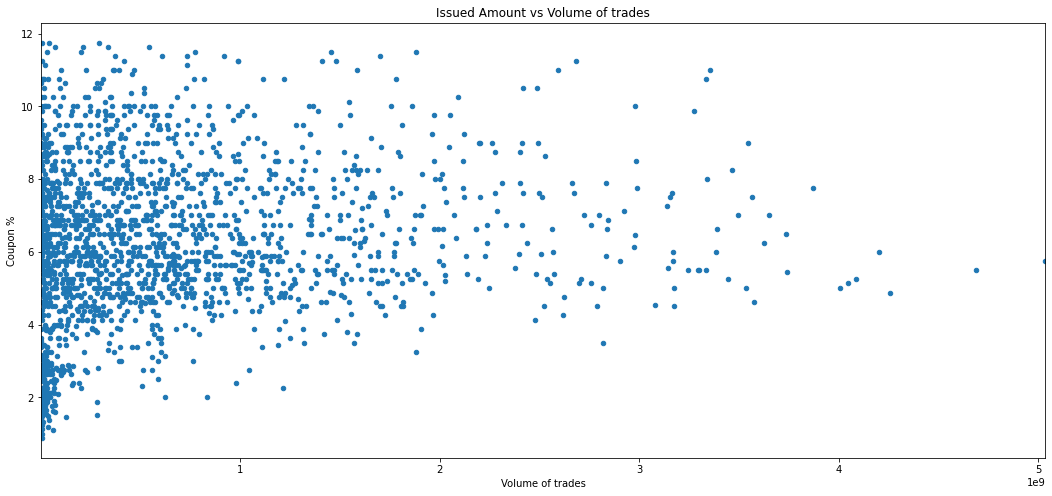

In [135]:

df.plot(kind = "scatter", x = "volume_trades", y = "Coupon")
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Volume of trades vs Coupon")
# plt.ylim(-3,3) # set y axis range if needed
plt.xlabel("Volume of trades")
plt.ylabel("Coupon %")
plt.margins(x = 0)

There is no visual relationship between How much a bond is traded vs the Coupon %

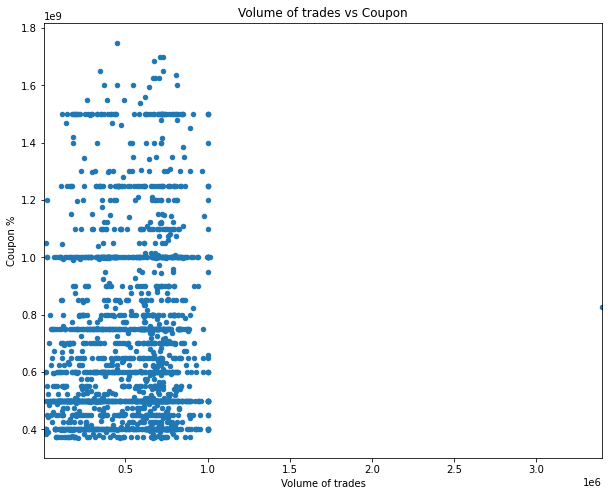

In [142]:

df.plot(kind = "scatter", x = "total_mean_size", y = "Issued Amount")
plt.rcParams["figure.figsize"] = (18, 8)
plt.title("Volume of trades vs Coupon")
# plt.ylim(-3,3) # set y axis range if needed
plt.xlabel("Volume of trades")
plt.ylabel("Coupon %")
plt.margins(x = 0)

We can observe there is one rogue super high value for Volume of trades. We can remove that row to reduce variance in the dataset.

Below is some summary statistics on the dataset

In [143]:
df.describe()

,Coupon,Issued Amount,Maturity At Issue months,LiquidityScore,LIQ SCORE,n_trades,volume_trades,total_median_size,total_mean_size,n_days_trade,days_diff_max,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
count,1924.000000,1.924000e+03,1924.000000,1924.000000,1924.000000,1924.000000,1.924000e+03,1.924000e+03,1.924000e+03,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1924.000000,1.924000e+03,1.924000e+03,1.924000e+03,1.924000e+03,1924.000000,1924.000000
mean,6.286985,7.096977e+08,92.818586,18.061275,0.180613,2095.059252,6.592276e+08,5.236667e+05,5.172611e+05,319.163721,704.726091,0.252761,0.691990,3.233368,0.372275,7.401012e+06,5.433359e+06,4.903049e+07,5.565021e+05,19.026480,2.129938
std,2.157212,3.047232e+08,26.872227,6.403289,0.064033,3328.092038,7.519305e+08,4.152273e+05,2.542612e+05,307.172824,543.304494,0.144352,0.195447,1.716855,0.136570,7.736289e+06,6.213209e+06,5.569088e+07,2.273016e+06,23.318395,3.509405
min,0.880000,3.700000e+08,16.930000,4.388758,0.043888,1.000000,2.500000e+04,4.000000e+03,6.666667e+03,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000e+04,1.600000e+04,2.000000e+04,1.000000e+03,1.000000,1.000000
25%,5.000000,5.000000e+08,72.892500,13.418116,0.134181,205.000000,1.023220e+08,7.800000e+04,3.137714e+05,64.000000,215.250000,0.145802,0.559657,1.000000,0.290475,2.797957e+06,2.000000e+06,1.229425e+07,2.000000e+04,5.577759,1.000000
50%,6.225000,6.000000e+08,97.230000,16.967948,0.169679,805.000000,4.161135e+08,5.000000e+05,5.616095e+05,222.000000,632.000000,0.259640,0.693925,3.000000,0.373399,5.383610e+06,3.826500e+06,2.687100e+07,1.000000e+05,11.905203,1.000000
75%,7.750000,8.977512e+08,121.640000,21.877247,0.218772,2439.500000,9.231830e+08,1.000000e+06,7.129778e+05,505.000000,1086.000000,0.353586,0.849448,5.000000,0.438560,9.581495e+06,6.897000e+06,6.856500e+07,4.000000e+05,23.154953,2.000000
max,11.750000,1.749200e+09,182.630000,35.891083,0.358911,26355.000000,5.036727e+09,3.400000e+06,3.400000e+06,1492.000000,2442.000000,1.000000,1.000000,5.000000,1.000000,1.179500e+08,1.179500e+08,4.107640e+08,4.840000e+07,228.155844,54.000000


We can further explore the data and find more things to consider.

In [144]:
print("My name is Hariharan Manickam")
print("My NetID is: hm32")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Hariharan Manickam
My NetID is: hm32
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.


Below is rough work & notes

Volume trade shows the liquidity

Liquidity score is a linear combination of other variables

Some bonds are held in ETFs. Some are not.

In [ ]:
# Scale the data

# Histograms
# Keep in mind binning bias

# Scatterplots
# Plot only if there is a reaon why x and y are related
# Ensure slicing is correct
# Pearson's correlation can be displayed on the chart

# ECDF - Emperical Cumulativ distribution function
# https://seaborn.pydata.org/generated/seaborn.ecdfplot.html
# https://stats.stackexchange.com/questions/239937/empirical-cdf-vs-cdf

# QQ plot
# Only relevant when we use linear regression
# Ex: Deceision tree doesn't care

# Bee swarm plot
# Kind of like putting 2 things on a single chart. Even ECDF
# Box plot is the standard way of doing this plot
# Choosing between both depends on what we're doing

# Parallel coordinated plot
# Is it needed?
# Dont plot bs plots

# Visualize interrelationships between x axis and y1/y2 axis.
# Basically 2 scatterplots side by side

# Heatmaps
# Visualizing attributes and label correlations

# PCA?

In [ ]:
# Y axis: Amount issued
# X axis: 
# Industry group by bar chart
# Coupon scatter
# Maturity type groupby Bar chart
# Liquidity Score scatter
# In ETF group by bar chart
# Maturity as issue months

In [ ]:
# Below are the variables we need to convert to numerical 
# Moodys

# S_and_P
# Fitch
# Bloomberg Composite Rating
# Maturity Type
# Coupon Type
# Industry
# IN_ETF
# Bond type # See what this i. How many unique values